In [1]:
import os
import sys
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
src_dir = os.path.join(parent_dir, 'src')
sys.path.append(src_dir)

import train_RESNET18
import preprocess_data

In [2]:
preprocess=False
if preprocess:
    preprocess_data.sample()
    preprocess_data.data()

train=False
if train:
    train_RESNET18.train()

c:\Users\karth\anaconda3\envs\xray_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\karth\anaconda3\envs\xray_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


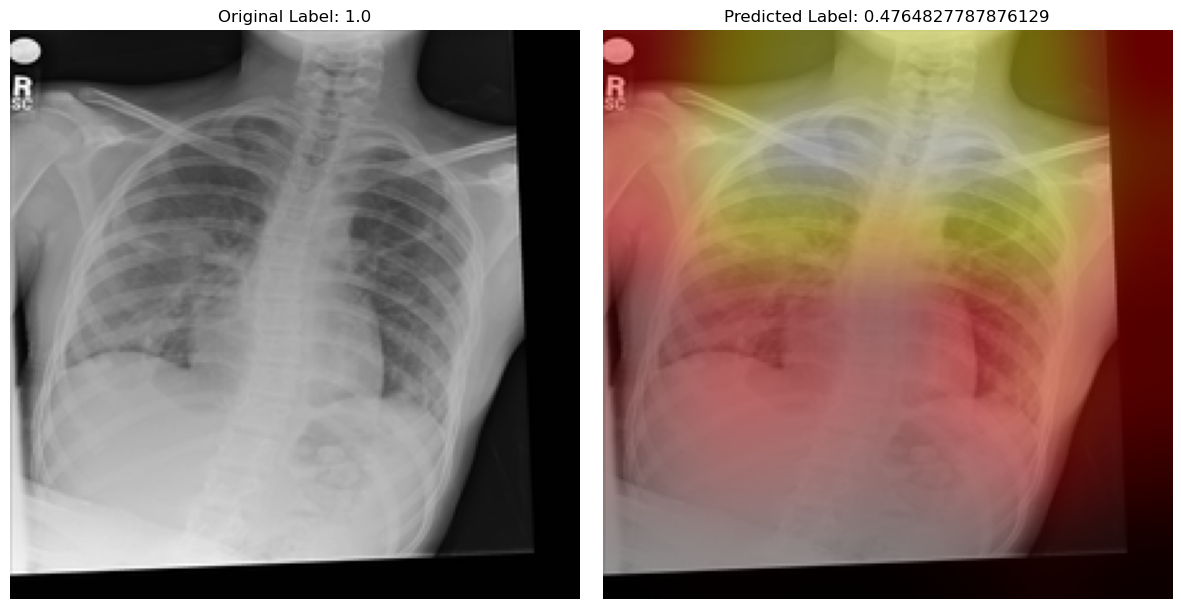

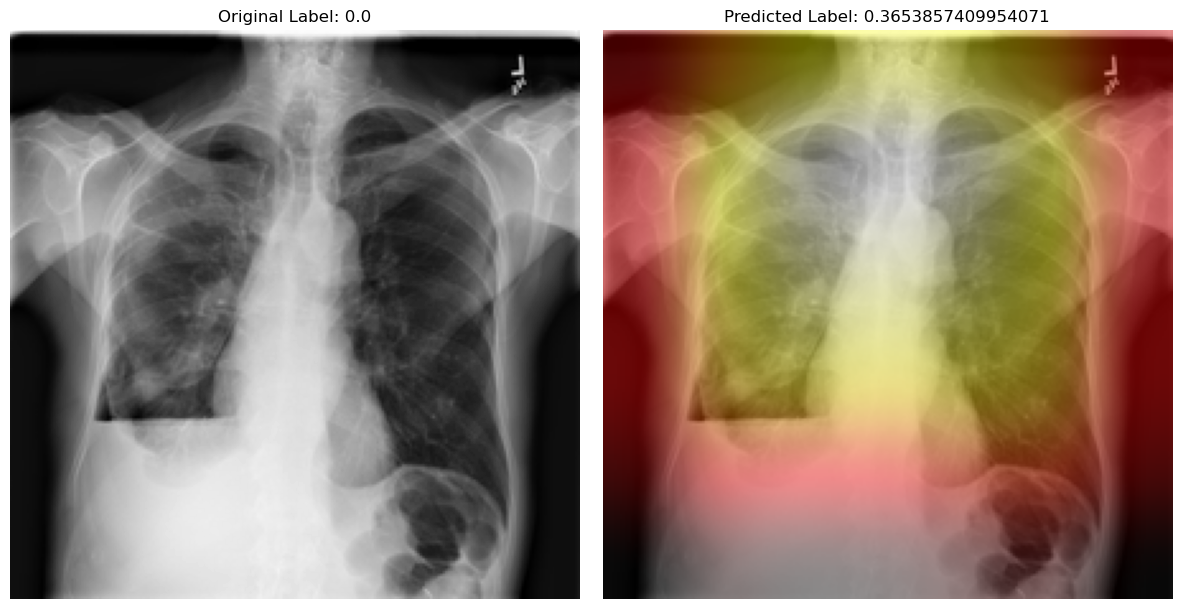

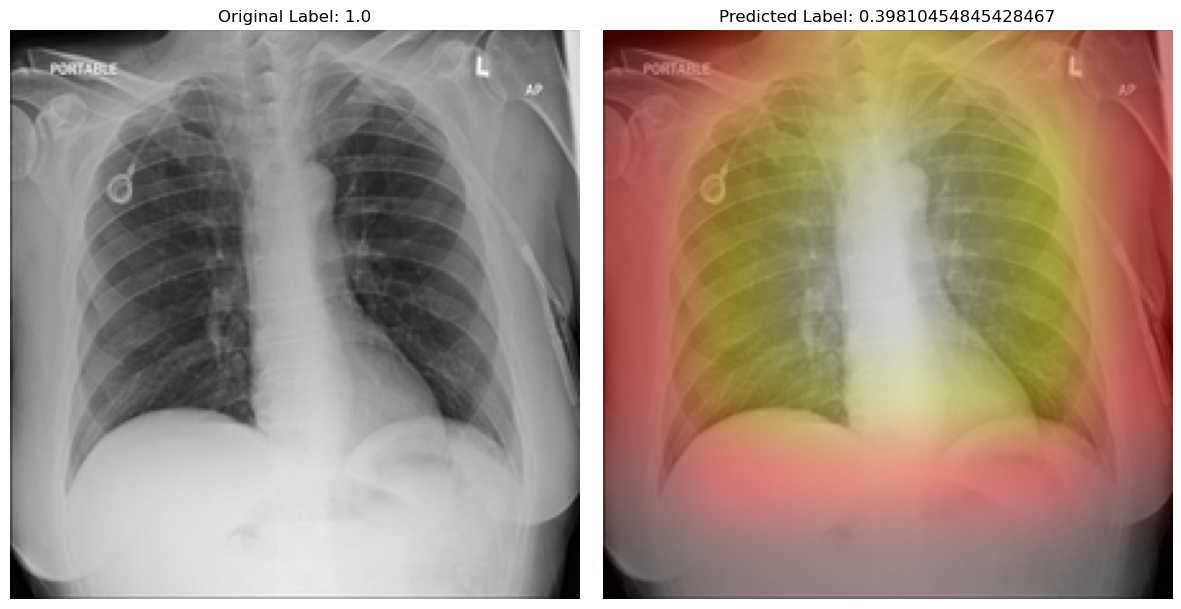

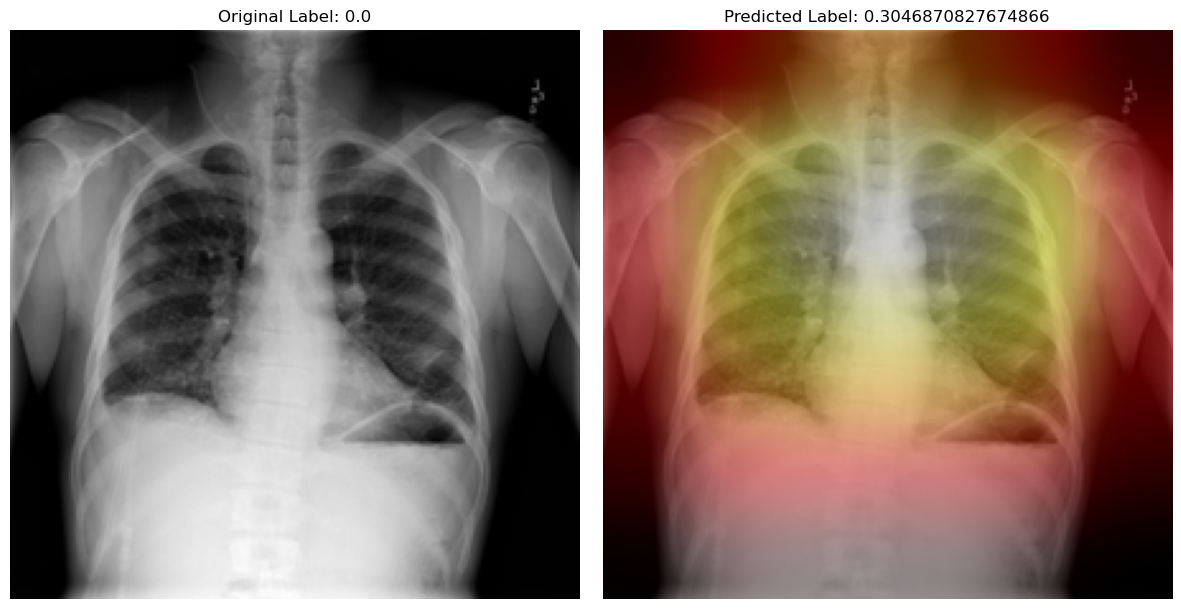

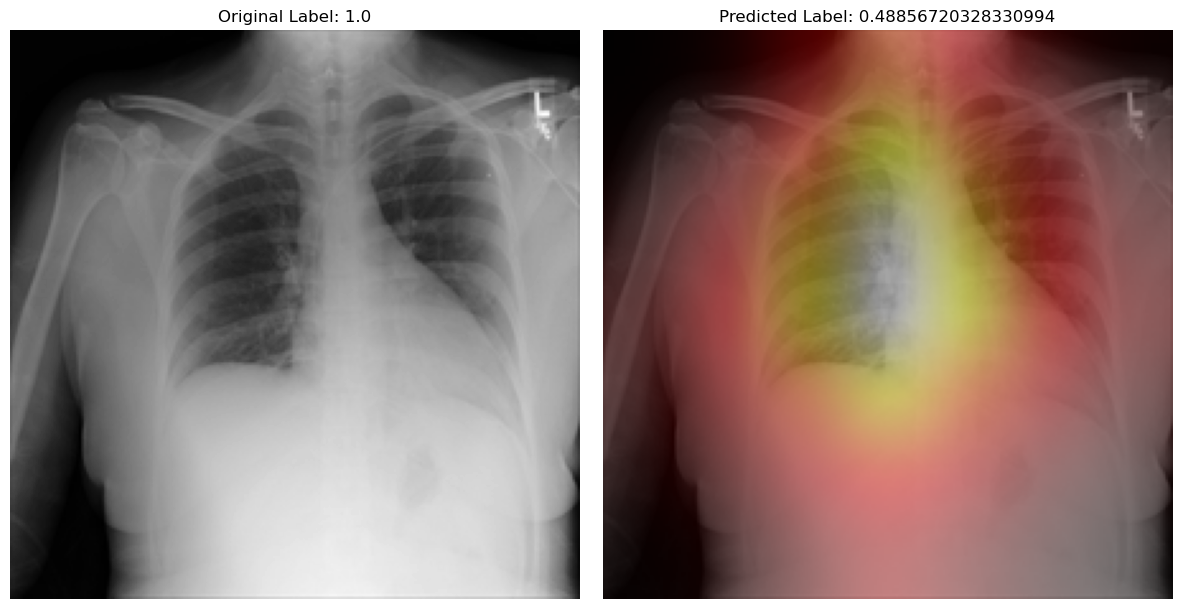

In [3]:
model_path = os.path.join(parent_dir, 'models', 'RESNET18_diseasedetection.pth')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = train_RESNET18.ResNet18ForChestXRay(1)
model.load_state_dict(torch.load(model_path))
model.to(device)

labels_path = os.path.join(parent_dir, 'data' , 'labels.csv')
image_dir = os.path.join(parent_dir, 'data')

dataset = train_RESNET18.ChestXRayDataset(labels_path, image_dir)
file_dict = dataset.file_dict

labels = pd.read_csv(labels_path)

random_sample = labels.sample(5, axis=0)

for index, row in random_sample.iterrows():
    image_path = os.path.join(image_dir, file_dict[row['Image Index']] , 'images' ,row['Image Index'])
    predictions, heatmap = train_RESNET18.predict_diseases(model, image_path)
    # disease = ", ".join([col for col in labels.columns if row[col] == 1])
    # predicted_disease = ", ".join([col for col in labels.columns[1:] if predictions[labels.columns.get_loc(col)-1] > 0.1])

    disease = row["No Finding"]
    predicted_disease = predictions[0]
    

    # Display the original image and the superimposed image
    image = Image.open(image_path).convert('L')
    image = image.resize((224, 224), Image.LANCZOS)  # Downscale the image
    img = np.array(image)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(img, cmap='gray')
    ax1.set_title(f"Original Label: {disease}")
    ax1.axis('off')
    ax2.imshow(heatmap, cmap='jet')
    ax2.set_title(f"Predicted Label: {predicted_disease}")
    ax2.axis('off')
    plt.tight_layout()
    plt.show()
    


In [4]:
model.eval()

ResNet18ForChestXRay(
  (resnet): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru